<a href="https://colab.research.google.com/github/Omprakash977/EDA-Telecom-churn-/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data reading
df = pd.read_csv('/content/drive/MyDrive/Datasets/Telecom Churn.csv')

In [4]:
# Exploring the first five rows of the dataset
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Exploring the last five values of the dataset
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
# Inspecting the length and number of columns of the dataset
df.shape

(3333, 20)

In [7]:
# Checking null values and data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
# Finding statistical measures of numerical columns
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Checking number of unique values of columns
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [10]:
# Detecting duplicate rows
df.duplicated().sum()

0

# Univariate Analysis

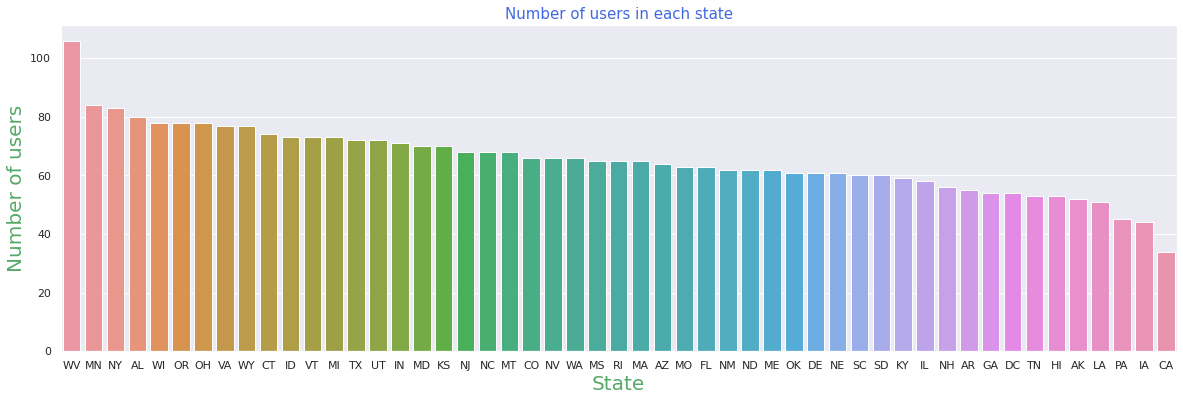

In [135]:
# Inspecting State column
fig_dims = (20,6)
fig = plt.subplots(figsize=fig_dims)
ax = sns.barplot(df['State'].value_counts().keys(),df['State'].value_counts())
ax.set_xlabel('State',color = 'g', size = 20)
ax.set_ylabel('Number of users',color = 'g', size = 20)
plt.title("Number of users in each state",size = 15, color = 'royalblue')
plt.show()

The top 5 states with maximum number of customers are WV,MN,NY,AL and OH.
There are least number of customers in PA,LA and CA states. 

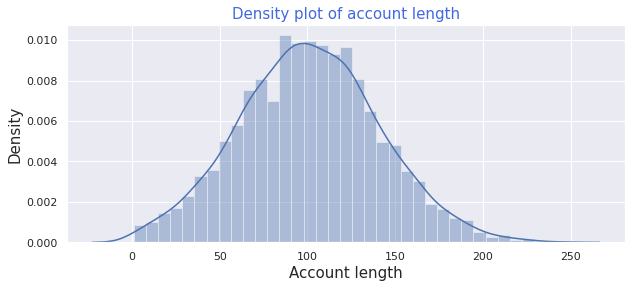

In [136]:
# Inspecting Account length column
sns.distplot(df['Account length'])
plt.xlabel("Account length",size = 15)
plt.ylabel("Density",size = 15)
plt.title("Density plot of account length",size = 15, color = 'royalblue')
plt.show()

Most of the customers have account for a duration of 100 to 150 days.

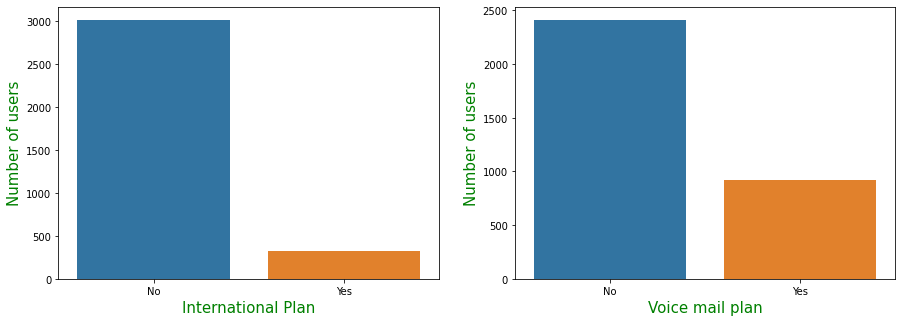

In [13]:
# Inspecting international plan column and Voice mail plan column

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# international plan column
sns.barplot(ax=axes[0], x = df['International plan'].value_counts().keys(), y = df['International plan'].value_counts())
axes[0].set_xlabel('International Plan',color = 'g', size = 15)
axes[0].set_ylabel('Number of users',color = 'g', size = 15)

# Voice mail plan column
sns.barplot(ax=axes[1], x = df['Voice mail plan'].value_counts().keys(),y = df['Voice mail plan'].value_counts())
axes[1].set_xlabel('Voice mail plan',color = 'g', size = 15)
axes[1].set_ylabel('Number of users',color = 'g', size = 15)

plt.show()


from the above plot it is clear that there are very few customers who have opted for international plan. And also there are not many customers who have opted for voice mail plan.


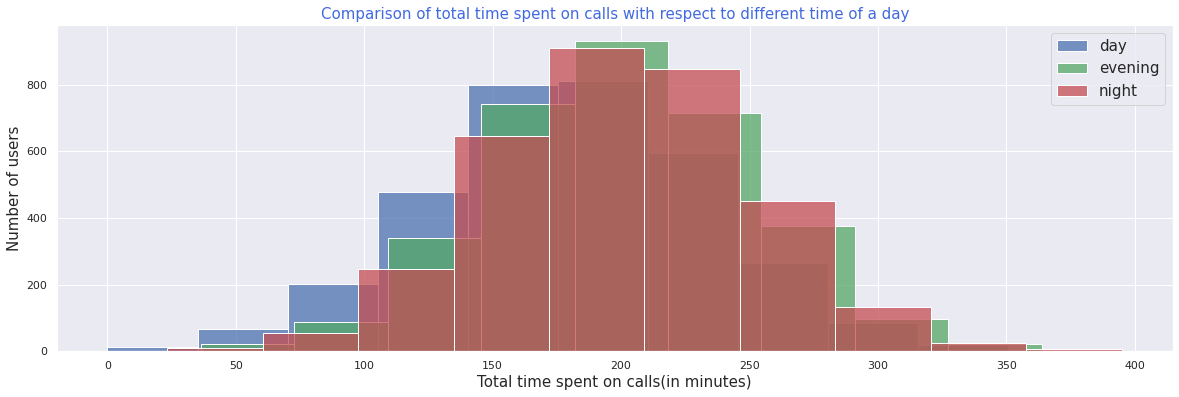

In [15]:
sns.set(rc={'figure.figsize':(20,6)})
sns.histplot(df['Total day minutes'],bins = 10,label = 'day')
sns.histplot(df['Total eve minutes'],bins = 10, color = 'g',label = 'evening')
sns.histplot(df['Total night minutes'], bins = 10, color = 'r',label = 'night')
plt.xlabel("Total time spent on calls(in minutes)",size = 15)
plt.ylabel("Number of users",size = 15)
plt.title("Comparison of total time spent on calls with respect to different time of a day",size = 15, color = 'royalblue')
plt.legend(fontsize=15)
plt.show()

Total time spent on calls are almost same in all times of the day.

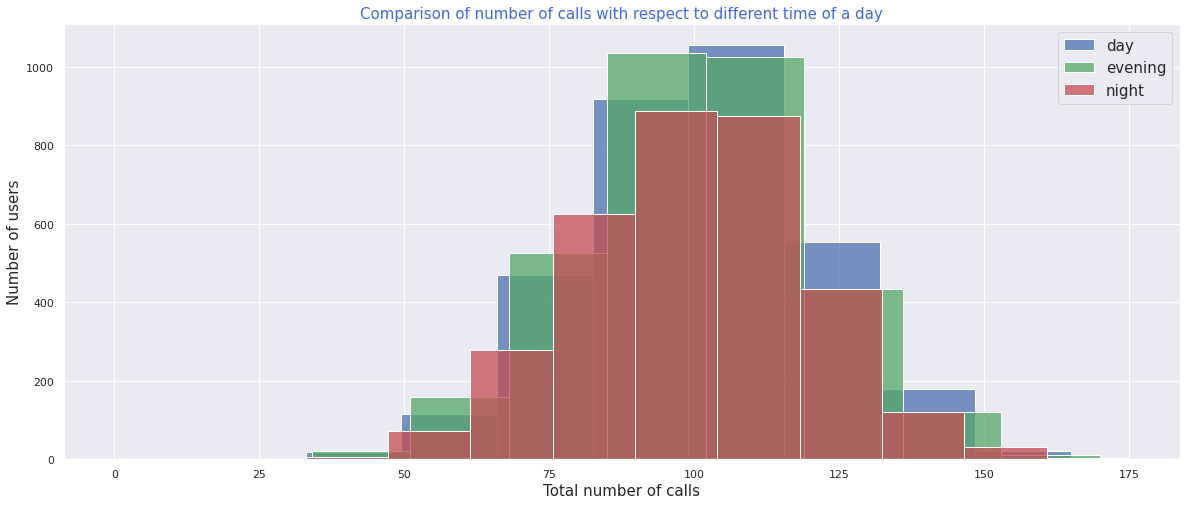

In [16]:
sns.set(rc={'figure.figsize':(20,8)})
sns.histplot(df['Total day calls'],bins = 10,label = 'day')
sns.histplot(df['Total eve calls'],bins = 10, color = 'g',label = 'evening')
sns.histplot(df['Total night calls'], bins = 10, color = 'r',label = 'night')
plt.xlabel("Total number of calls",size = 15)
plt.ylabel("Number of users",size = 15)
plt.title("Comparison of number of calls with respect to different time of a day",size = 15, color = 'royalblue')
plt.legend(fontsize=15)
plt.show()


Total number of calls are little less in nights as compared to other times of the day.

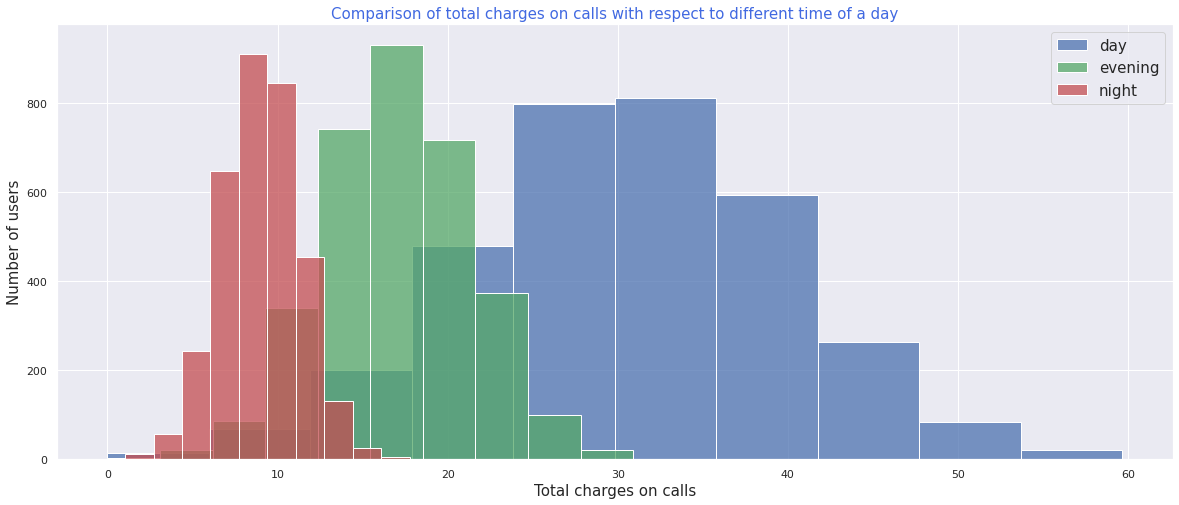

In [17]:
sns.set(rc={'figure.figsize':(20,8)})
sns.histplot(df['Total day charge'],bins = 10,label = 'day')
sns.histplot(df['Total eve charge'],bins = 10, color = 'g',label = 'evening')
sns.histplot(df['Total night charge'], bins = 10, color = 'r',label = 'night')
plt.xlabel("Total charges on calls",size = 15)
plt.ylabel("Number of users",size = 15)
plt.title("Comparison of total charges on calls with respect to different time of a day",size = 15, color = 'royalblue')
plt.legend(fontsize=15)
plt.show()

The charges in night are less as compared to other times of the day.

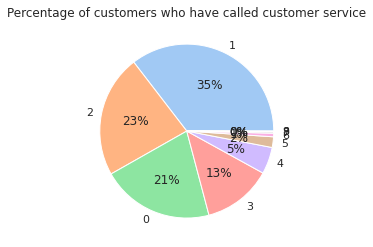

In [133]:
#defining Seaborn color palette to use
colors = sns.color_palette('pastel')[0:9]

#creating pie chart
plt.pie(df['Customer service calls'].value_counts(), labels = df['Customer service calls'].value_counts().keys(),colors = colors, autopct='%.0f%%')
plt.title('Percentage of customers who have called customer service')
plt.show()

There are very few customers(around 8%) who have called customer service moro than 3 times.

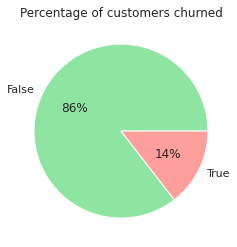

In [134]:
#defining Seaborn color palette to use
colors = sns.color_palette('pastel')[2:4]

#creating pie chart
plt.pie(df['Churn'].value_counts(), labels = df['Churn'].value_counts().keys(),colors = colors, autopct='%.0f%%')
plt.title('Percentage of customers churned')
plt.show()

# Influence of numerical columns on churn

In [ ]:
sns.set(rc={'figure.figsize':(10,4)})
col = list(df.columns)
col1 = [i for i in col if i not in ['State','Area code','International plan','Voice mail plan',
 'Number vmail messages','Customer service calls','Churn']]
for i in col1:
  fig, ax = plt.subplots()

  sns.kdeplot(df[df["Churn"]==False][i],shade=True, color="blue", label= "not churned", ax=ax)
  sns.kdeplot(df[df["Churn"]==True][i],shade=True, color="green", label= "churned", ax=ax)

  ax.set_xlabel(i)
  ax.set_ylabel("Density")
  plt.legend()

  fig.suptitle(f"{i} vs churn")

From the above plots it is clear that:
* When account length is more i.e. 100-130 are most likely to Churn.
* Churn is high when total day charges and total night charges are high but that is not the case in total evening charges.
* The Churn is high when total international call are less.

# Influence of categorical columns on churn

In [132]:
# Creating dataframe having data of churned customers
df_churn = df[df['Churn']==True]

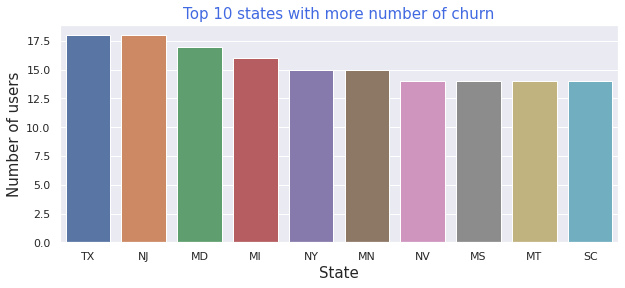

In [131]:
# Plotting top 10 states where churn is more.

sns.barplot(df_churn['State'].value_counts()[:10].keys(),df_churn['State'].value_counts()[:10])
plt.xlabel("State",size = 15)
plt.ylabel("Number of users",size = 15)
plt.title("Top 10 states with more number of churn",size = 15, color = 'royalblue')
plt.show()

Telecom company need to focus more on these states.

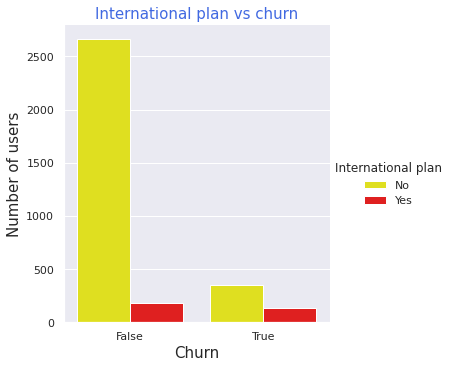

In [116]:
# Catplot of International plan vs churn

fig, ax = plt.subplots()
sns.catplot("Churn", hue="International plan", data=df, kind="count", palette={'No':"yellow", 'Yes':"red"}, ax=ax)
plt.close(1) # catplot creates an extra figure we don't need
plt.xlabel("Churn",size = 15)
plt.ylabel("Number of users",size = 15)
plt.title("International plan vs churn",size = 15, color = 'royalblue')
plt.show()

* Customers who have churned among those most of them have not opted for international plan.

* And there are very few customers opted for international plans among the customers who haven't churn.  

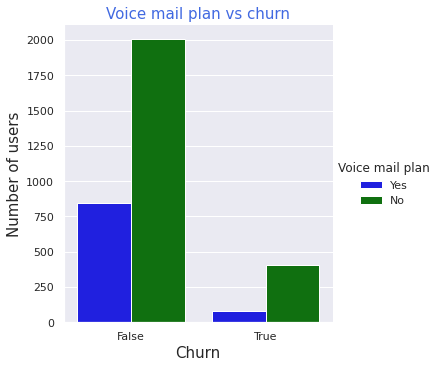

In [128]:
# Catplot of Voice mail plan vs churn

fig, ax = plt.subplots()
sns.catplot("Churn", hue="Voice mail plan", data=df, kind="count", palette={'No':"green", 'Yes':"blue"}, ax=ax)
plt.close(1) # to remove the extra figure
plt.xlabel("Churn",size = 15)
plt.ylabel("Number of users",size = 15)
plt.title("Voice mail plan vs churn",size = 15, color = 'royalblue')
plt.show()

Customers who have churned among those most of them have not opted for voice mail plan.

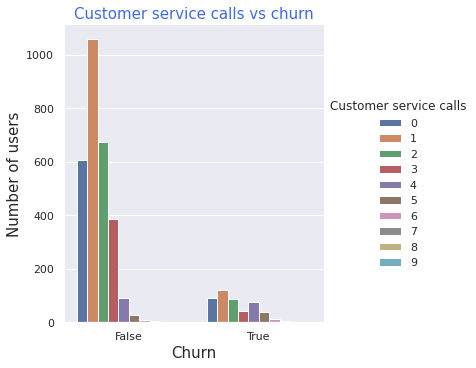

In [129]:
# Catplot of Customer service calls vs churn

fig, ax = plt.subplots()
sns.catplot("Churn", hue="Customer service calls", data=df, kind="count", ax=ax)
plt.close(1) # catplot creates an extra figure we don't need
plt.xlabel("Churn",size = 15)
plt.ylabel("Number of users",size = 15)
plt.title("Customer service calls vs churn",size = 15, color = 'royalblue')
plt.show()

Customers who have churned among those most of them have called customer service once.